In [3]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import exp
from sympy import Symbol
import statistics as st
x = Symbol('x')
y= Symbol('y')

## Задание:
Кондитерская снабжает фирменным печеньем несколько магазинов. Менеджер кондитерской должен определить количество печенья выпекаемого каждый день. Менеджер ставит перед вами задачу по поиску оптимального количества печенек.

Из анализа накопившихся данных он оценивает спрос на печенье в среднем в 2500 упаковок по дюжине печений в день и стандартном отклонении спроса около 500 упаковок, также предпологается, логонормальное распределение спроса.

Каждая упаковка продается за 50 рублей, а стоит изготовителю 30 руб., что включает обработку и перевозку. Печенье, которое не удалось передать в магазины до конца дня, уценивается до 15 руб. и по этой цене целиком продается на следующий день как учененный товар.

какова при этом будет средняя и медианная величина прибыли?
сколько печенья Вы посоветуете печь ежедневно (ваш оптимальный заказ)?
очевидно, что фирма несет издержки и в случае, если возник дефицит печенья, и в случае, если некоторая часть печенья осталась не раскупленной. Какую сумму в среднем фирма теряет на избытке и на недостатке печенья при оптимальном заказе?
как изменятся ответы на вопросы 1, 2 и 3, если стандартное отклонение увеличится до 1000 упаковок?

# 1. Стандартное отклонение 500



### Входные данные 

In [4]:
full_price=50 #цена упаковки
cut_price=15 #цена списанной упаковки
costs=30 #издержки 
full_price_after_costs=full_price-costs #выручка от проданной упаковки без издержек 
cut_price_after_costs=cut_price-costs #выручка от списанной упаковки без издержек
mean=2500 #средний спрос в уп
std1=500 # стандартное отклонение спроса в уп 

### 1.1. Поиск сигма и мю для моделирования спроса 

In [5]:
system=solve([(exp(x+y**2/2))-mean,(exp(y**2)-1)*(exp(2*x+y**2))-std1**2])# Решаем систему 1уравнение:мат.ожидание 2:отклонение  #mean_log=system[0][x] # мат ожидание для логонормального распред
sigma_log=system[1][y] #  второй параметр для логонорм распред 
mu_log=system[0][x] # первый параметр для логонормального распред

### 1.2. Моделирование спроса по логонормальному распределению  (пример одной выборки)

mean: 2500 mode: 2468.0 median: 2450.0


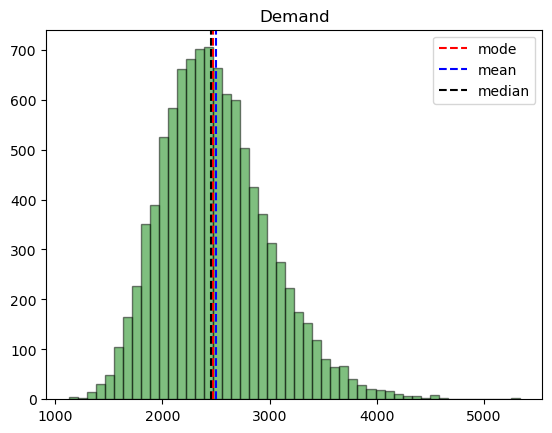

In [10]:
#задаём спрос логонормальным распределением
np.random.seed(42)
n=10000
demand=np.round(np.random.lognormal(mu_log,sigma_log,size=n))
# мода,медиана и среднее для спроса 
mean=2500
mode=st.mode(demand)
median=np.median(demand)
print("mean:",mean,"mode:",mode,"median:",median)
# визуализация  спроса 
plt.title("Demand")
plt.hist(demand, bins=50, ec="k",alpha=0.5,color='g')
plt.axvline(mode, linestyle = '--', label = "mode",color='r');
plt.axvline(mean, linestyle = '--', label = 'mean', color='b')
plt.axvline(median, linestyle = '--', label = 'median', color='k')
plt.legend();

### 1.3. Прибыль на основе фиксированного предложения(производим перербор) и случайного спроса

In [33]:
# смотрим максиамльный и минимальный возможный спрос 
max_demand=demand.max()
min_demand=demand.min()
# возможное предложение, как перебор значений от min_demand до max_demand
possible_supply=np.arange(min_demand,max_demand+1)
revenue=np.zeros((len(possible_supply),len(demand)))
sale=np.zeros((len(possible_supply),len(demand)))
# Массив прибыли в зависимости от возможного предложения и !!!!случайного!!!! спроса 
for i in np.arange(len(possible_supply)):
    sale[i,:]=np.reshape(np.round(np.random.lognormal(mu_log,sigma_log,size=n)),(1,n))
    revenue[i,:]= np.where(possible_supply[i]>sale[i],20*sale[i]-15*(possible_supply[i]-sale[i]),20*possible_supply[i])
    
print(revenue)

[[ 22540.  22540.  22540. ...  22540.  22540.  22540.]
 [ 22560.  22560.  22560. ...  22560.  22560.  22560.]
 [ 22580.  22580.  22580. ...  22580.  22580.  22580.]
 ...
 [ 27805. -12445.  22520. ...   9675.  -4045.  17060.]
 [  8050.   4865.  -1995. ...  -1575.  22470.  -3010.]
 [ 20635.  18430.  14335. ... -17130.  -7050.  20915.]]


### 1.4. Средняя и медианная величина прибыли в зависимости от предложения + визуализация 
#### (Ответ пункт 1)

[22540. 22560. 22580. ...  5755.  5705.  5795.] [22539.8495 22560.     22580.     ...  7472.331   7373.394   7460.0025]


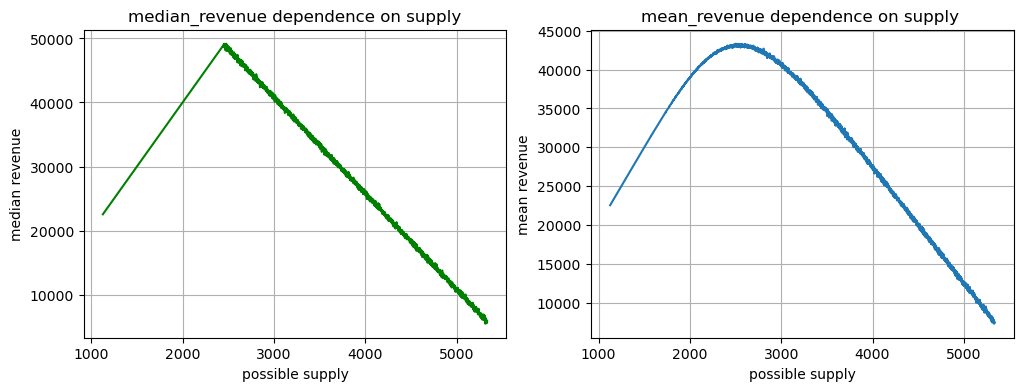

In [39]:
# нашли среднюю и медианую величину прибыли для всех мультивселенных в зависимости от предложением
median_revenue=np.array([np.median(revenue[i,:]) for i in np.arange(len(revenue))] ) 
mean_revenue=np.array([np.mean(revenue[i,:]) for i in np.arange(len(revenue))])
print(median_revenue,mean_revenue)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
ax1.grid(True)
ax2.grid(True)
ax1.plot(possible_supply,median_revenue,color='g')
ax1.set_xlabel("possible supply")
ax1.set_ylabel("median revenue")
ax1.set_title("median_revenue dependence on supply")
ax2.plot(possible_supply,mean_revenue)
ax2.set_xlabel("possible supply")
ax2.set_ylabel("mean revenue")
ax2.set_title("mean_revenue dependence on supply ");

### 1.5. Оптимальное предложение 
#### (Ответ пункт 2)
##### Пояснение к ответу на пункт 2: в качестве оптимального заказа было выбрано предложение, которое даёт наибольшее медианное значение прибыли при логонормальном распределении спроса, так как среднее значение прибыли может сильно отличаться от большинства значений в выборке

Оптимальный заказ в упаковках: 2478.0 Оптимальный заказ в штуках печенья: 24780.0


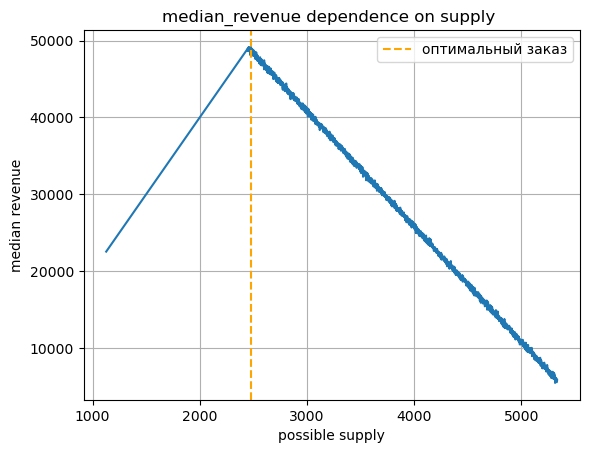

In [40]:
# составляем словаврь (медианная приыбль-предложение) 
median_revenue_dict={}
for i in np.arange(len(revenue)):
    median_revenue_dict[np.median(revenue[i,:])]=possible_supply[i]
# предложение,которое соответсвует максимальному медианному значению прибыли, выбираем оптимальным        
optimal_supply=median_revenue_dict.get(median_revenue.max())
print("Оптимальный заказ в упаковках:", optimal_supply,"Оптимальный заказ в штуках печенья:", optimal_supply*10)
# График 
plt.grid(True)
plt.plot(possible_supply,median_revenue)
plt.xlabel("possible supply")
plt.ylabel("median revenue")
plt.title("median_revenue dependence on supply ")
plt.axvline(optimal_supply,linestyle='--', label="оптимальный заказ", color='orange')
plt.legend();

### 1.6. Расчёт средних потерь от дефицита/излишка при оптимальном заказе 
#### (Ответ пункт 3)

In [67]:
fit_demand=sale[np.where(possible_supply==optimal_supply)] #спрос соотвествующий оптимальному предложению

In [72]:
conditions=[optimal_supply>fit_demand, optimal_supply==fit_demand, optimal_supply<fit_demand]
choices=[15*(optimal_supply-fit_demand),0,20*(fit_demand-optimal_supply)]

In [73]:
losts=np.array([np.select(conditions,choices)])
mean_losts=np.mean(losts)
print("Cредние потери при оптимальном заказе:", mean_losts)

Cредние потери при оптимальном заказе: 6993.735


# 2. Cтандартное отклонение 1000


### Входные данные + моделирование спроса 

In [81]:
price_full=50 #цена упаковки
price_cut=15 #цена непроданной упаковки
costs=30 #издержки 
mean=2500 #средний спрос в уп
std2=1000 # стандартное отклонение спроса в уп 
system=solve([(exp(x+y**2/2))-mean,(exp(y**2)-1)*(exp(2*x+y**2))-std2**2])# Решаем систему 1уравнение:мат.ожидание 2:отклонение  #mean_log=system[0][x] # мат ожидание для логонормального распред
sigma_log=system[1][y] #  второй параметр для логонорм распред 
mu_log=system[0][x] # первый параметр для логонормального распред


mean: 2500 mode: 1999.0 median: 2319.0


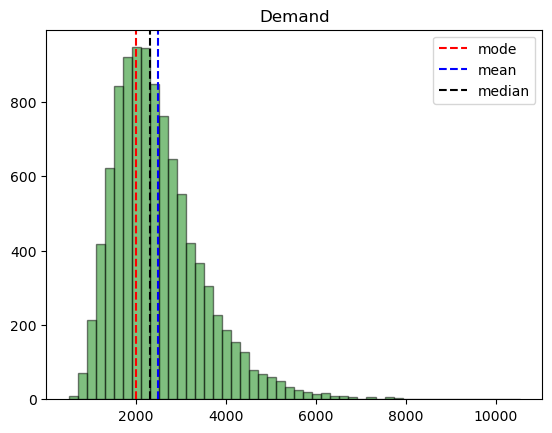

In [82]:
#задаём спрос логонормальным распределением
np.random.seed(42)
n=10000
demand=np.round(np.random.lognormal(mu_log,sigma_log,size=n))
# мода,медиана и среднее для спроса 
mean=2500
mode=st.mode(demand)
median=np.median(demand)
print("mean:",mean,"mode:",mode,"median:",median)
# визуализация  спроса 
plt.title("Demand")
plt.hist(demand, bins=50, ec="k",alpha=0.5,color='g')
plt.axvline(mode, linestyle = '--', label = "mode",color='r');
plt.axvline(mean, linestyle = '--', label = 'mean', color='b')
plt.axvline(median, linestyle = '--', label = 'median', color='k')
plt.legend();

### 2.1 Среднее и медианное значение прибыли (от предложения)
#### Ответ на пункт 1

[ 10240.  10280.  10320. ... -76190. -77165. -76110.] [ 10240.      10280.      10319.6465 ... -69869.2345 -70889.5035
 -70083.385 ]


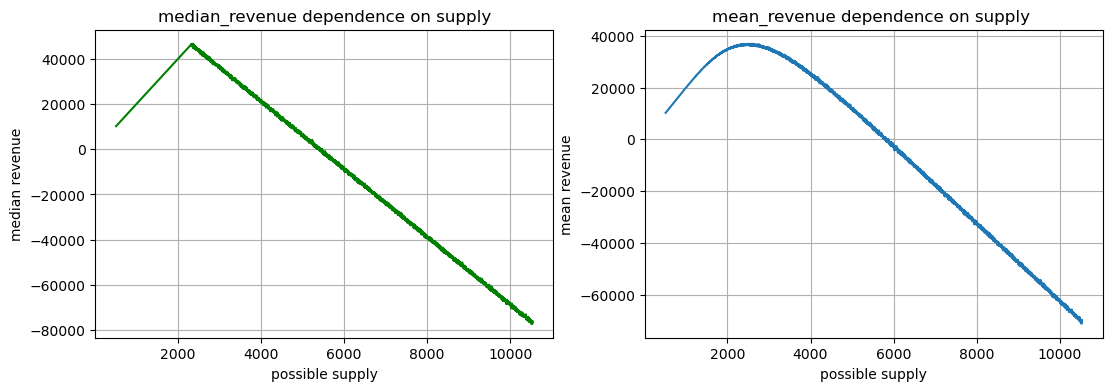

In [83]:
# смотрим максиамльный и минимальный возможный спрос 
max=demand.max()
min=demand.min()
possible_supply=np.arange(min,max+1,2)
revenue=np.zeros((len(possible_supply),len(demand)))
sale=np.zeros((len(possible_supply),len(demand)))
# Массив прибыли в зависимости от возможного предложения и !!!!случайного!!!! спроса 
for i in np.arange(len(possible_supply)):
    sale[i,:]=np.reshape(np.round(np.random.lognormal(mu_log,sigma_log,size=n)),(1,n))
    revenue[i,:]= np.where(possible_supply[i]>sale[i],20*sale[i]-15*(possible_supply[i]-sale[i]),20*possible_supply[i])
# нашли среднюю и медианую величину прибыли для всех мультивселенных с определенным предложением
median_revenue=np.array([np.median(revenue[i,:]) for i in np.arange(len(revenue))] ) 
mean_revenue=np.array([np.mean(revenue[i,:]) for i in np.arange(len(revenue))])
print(median_revenue,mean_revenue)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,4))
ax1.grid(True)
ax2.grid(True)
ax1.plot(possible_supply,median_revenue,color='g')
ax1.set_xlabel("possible supply")
ax1.set_ylabel("median revenue")
ax1.set_title("median_revenue dependence on supply")
ax2.plot(possible_supply,mean_revenue)
ax2.set_xlabel("possible supply")
ax2.set_ylabel("mean revenue")
ax2.set_title("mean_revenue dependence on supply ");

### 2.2 Оптимальное предложение 
#### Ответ на пункт 2 

Оптимальный заказ в упаковках: 2320.0 Оптимальный заказ в штуках печенья: 23200.0


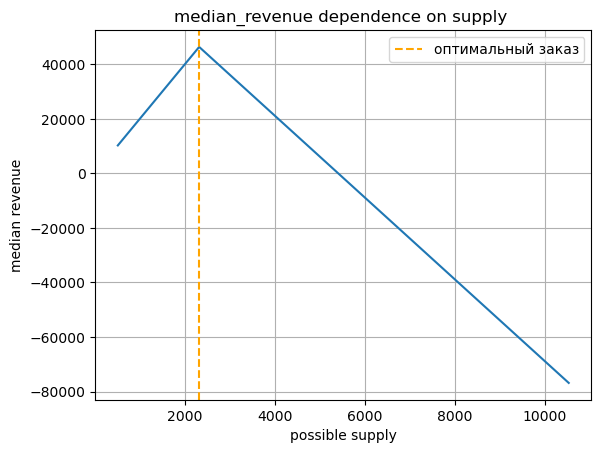

In [105]:
# составляем словаврь (медианная приыбль-предложение) 
median_revenue_dict={}
for i in np.arange(len(revenue)):
    median_revenue_dict[np.median(revenue[i,:])]=possible_supply[i]
# предложение,которое соответсвует максимальному медианному значению прибыли, выбираем оптимальным        
optimal_supply=median_revenue_dict.get(median_revenue.max())
print("Оптимальный заказ в упаковках:", optimal_supply,"Оптимальный заказ в штуках печенья:", optimal_supply*10)
# График 
plt.grid(True)
plt.plot(possible_supply,median_revenue)
plt.xlabel("possible supply")
plt.ylabel("median revenue")
plt.title("median_revenue dependence on supply ")
plt.axvline(optimal_supply,linestyle='--', label="оптимальный заказ", color='orange')
plt.legend();

### 2.3. Расчёт средних потерь от дефицита/излишка при оптимальном заказе 
#### (Ответ пункт 3)

In [106]:
losts=np.array([ np.where(optimal_supply>demand,15*(optimal_supply-demand),20*(demand-optimal_supply))])
mean_losts=np.mean(losts)
print("Cредние потери при оптимальном заказе:", mean_losts)

Cредние потери при оптимальном заказе: 13596.911


In [ ]:
## замечания спрос нужно заново моделировать для каждого предложения к пункту 1 
№№